In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Convert this cell into code to automatically run the scraper to update the value

%run C:/Users/prath/Desktop/Stock_Predictor/scraper/scraper.ipynb

In [76]:
df = pd.read_csv("historic_data/csv/TCS.NS.csv")

# Drop all rows where volume is 0
df = df[df["Volume"] != 0]

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Drop rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan) # replace inf values with NaN
df = df.dropna() # drop rows with NaN values

# Convert the date column to ordinal values
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())

# Split the data into features (X) and target (y)
X = df.drop("Adjusted Close", axis=1).sort_values(by="Date")
y = df["Adjusted Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

# Fit the Random Forest Regressor model to the training data
rfr = RandomForestRegressor(n_estimators=10000, min_samples_leaf=10)
rfr.fit(X_train, y_train)


# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)


In [87]:
y_test


2960     865.614929
1172     227.607361
1282     188.385925
4742    3653.800293
3992    1807.080688
           ...     
2070     414.020874
3660    1025.155518
2901     885.113464
3784    1137.548218
4406    1761.231567
Name: Adjusted Close, Length: 964, dtype: float64

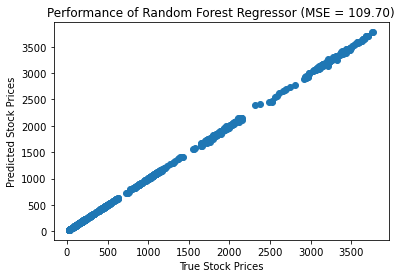

In [78]:
# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()

In [86]:
# sort y_test based on the first column
sorted_indices = y_test[:, 0].argsort()
y_test_sorted = y_test[sorted_indices]

# sort y_pred based on the same order
y_pred_sorted = y_pred[sorted_indices]

# now both arrays are sorted based on the first column of y_test


KeyError: 'key of type tuple not found and not a MultiIndex'